In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [2]:
BREAST_CANCER_data = pd.read_csv("data.csv")


In [3]:
BREAST_CANCER_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
BREAST_CANCER_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
BREAST_CANCER_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### chek null & remove null

In [6]:
print(BREAST_CANCER_data.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
BREAST_CANCER_data.dropna(axis=1 ,inplace=True)

In [8]:
print(BREAST_CANCER_data.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### duplicate

In [9]:
BREAST_CANCER_data.duplicated().value_counts()

False    569
Name: count, dtype: int64

### analysis data

In [ ]:
for col in BREAST_CANCER_data.columns:
    plt.bar(BREAST_CANCER_data["diagnosis"] , BREAST_CANCER_data[col])
    plt.xlabel("diagnosis")
    plt.ylabel(col)
    plt.show()

In [11]:
normalized_col =[]
for col in BREAST_CANCER_data.columns:
    if(BREAST_CANCER_data[col].dtype == "float64" or BREAST_CANCER_data[col].dtype== "int64"):
        if BREAST_CANCER_data[col].mean() > 10: 
            normalized_col.append(col)
normalized_col.remove("id")
print(normalized_col)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']


### Splite features & target

In [12]:
y = pd.DataFrame(BREAST_CANCER_data["diagnosis"])
X=BREAST_CANCER_data.drop("diagnosis",axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
X_train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.064993e+07,14.124288,19.307560,91.93967,656.671429,0.096368,0.104422,0.089133,0.048828,0.181880,...,16.263349,25.788615,107.198791,883.610110,0.132334,0.255079,0.273968,0.115016,0.291143,0.084470
std,1.263882e+08,3.626241,4.284646,24.92217,363.880338,0.014150,0.052310,0.080487,0.038941,0.027653,...,4.955826,6.161780,34.263329,588.111471,0.022417,0.155025,0.210371,0.065850,0.063012,0.018265
min,8.670000e+03,6.981000,9.710000,43.79000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.698110e+05,11.605000,16.155000,74.68500,409.250000,0.086210,0.066495,0.029320,0.020340,0.163050,...,12.835000,21.185000,83.590000,504.300000,0.116950,0.147500,0.114450,0.065225,0.251000,0.072400
50%,9.071450e+05,13.400000,18.900000,86.87000,551.100000,0.095940,0.095090,0.061810,0.033260,0.179700,...,14.960000,25.410000,97.670000,686.500000,0.131400,0.215800,0.226000,0.099750,0.283400,0.080320
75%,8.812831e+06,15.815000,21.805000,103.95000,785.600000,0.105100,0.130400,0.130000,0.073820,0.196300,...,18.775000,29.880000,125.250000,1079.000000,0.146000,0.338500,0.381900,0.161350,0.318150,0.092460
max,9.113205e+08,28.110000,39.280000,188.50000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


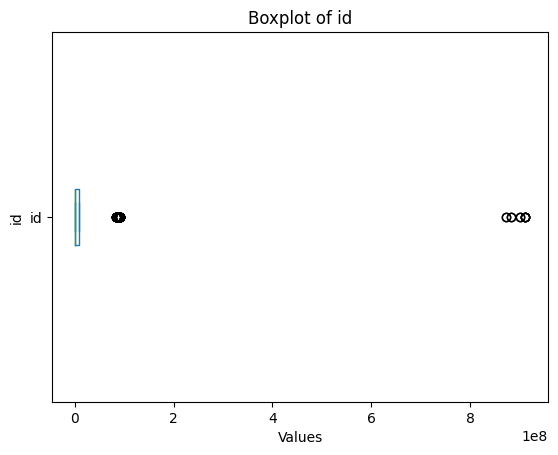

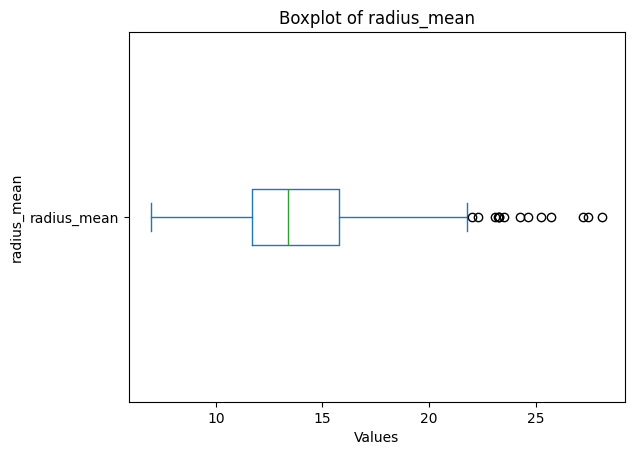

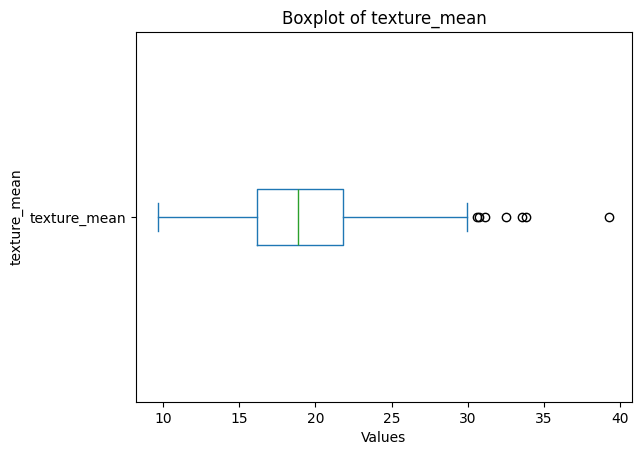

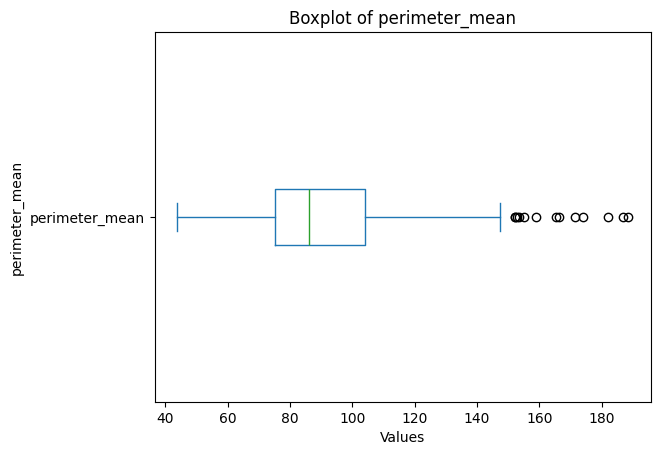

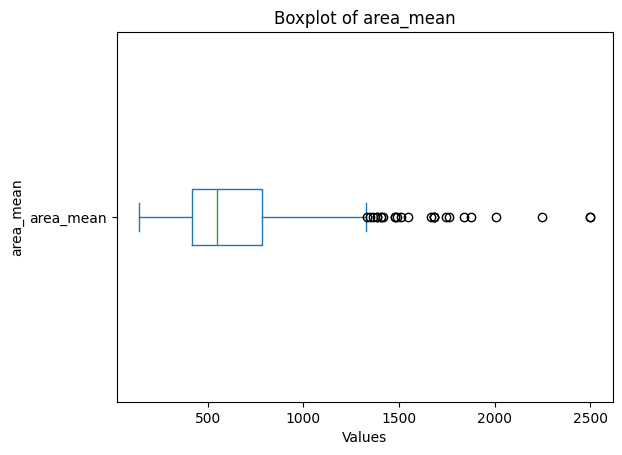

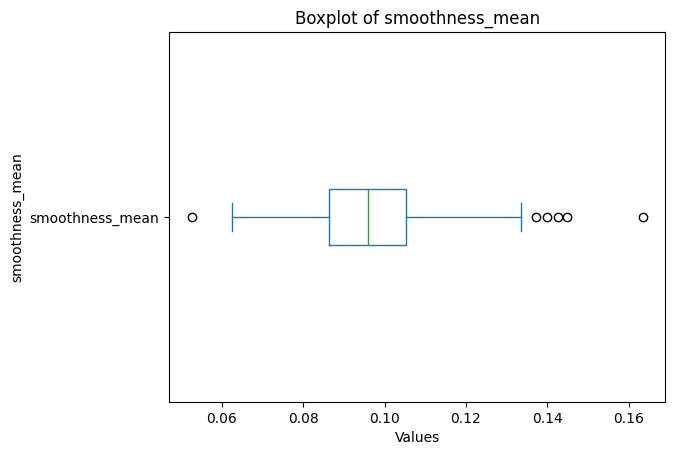

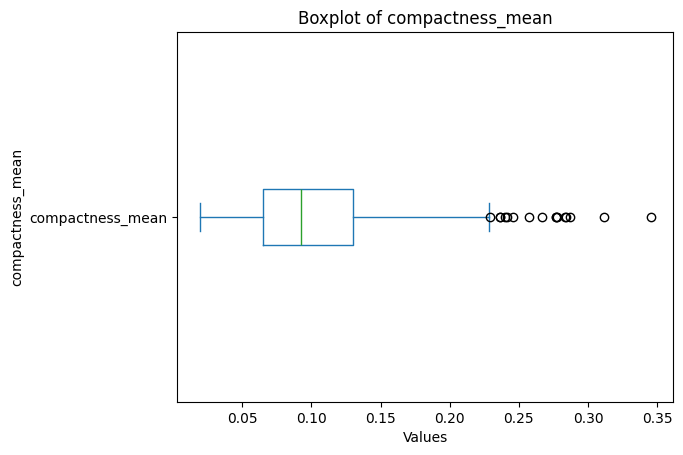

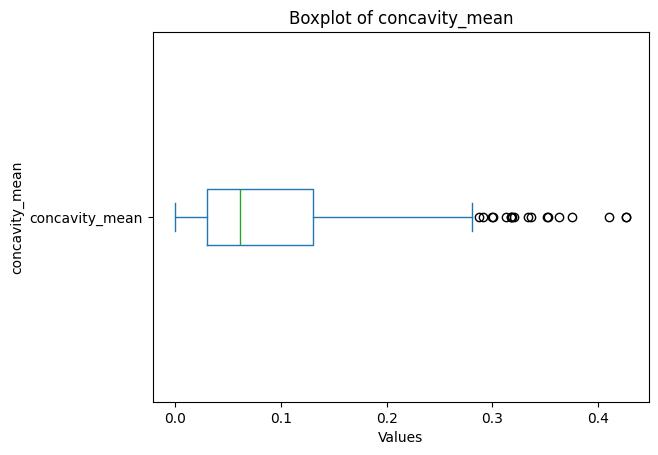

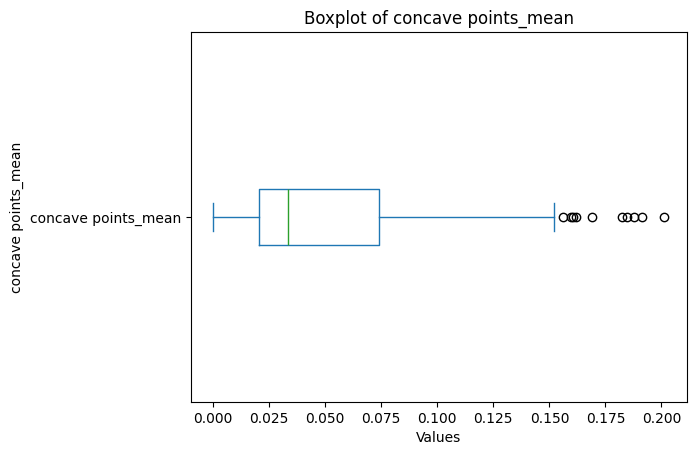

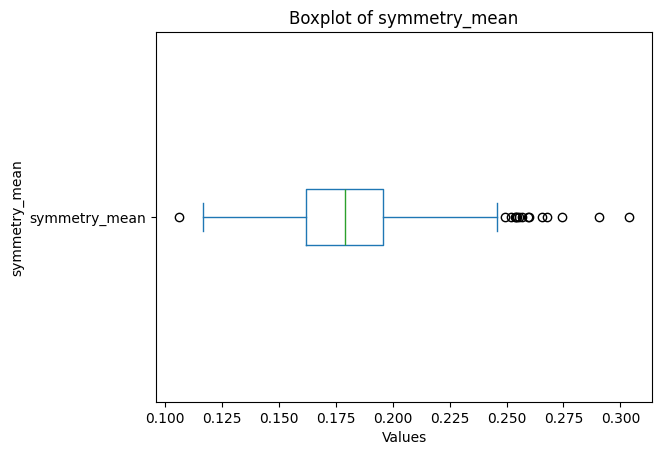

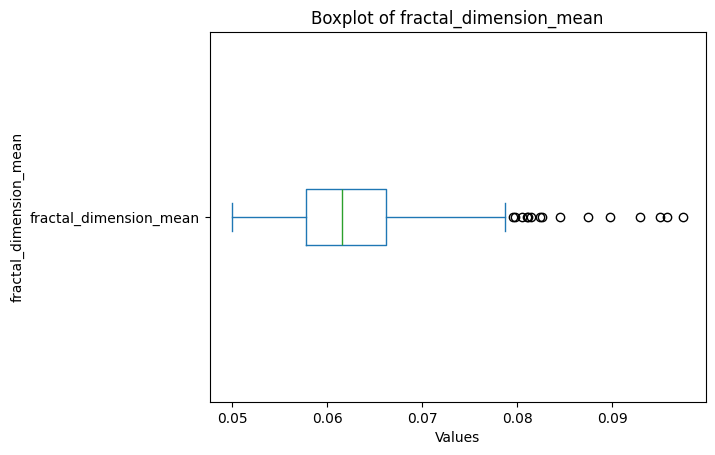

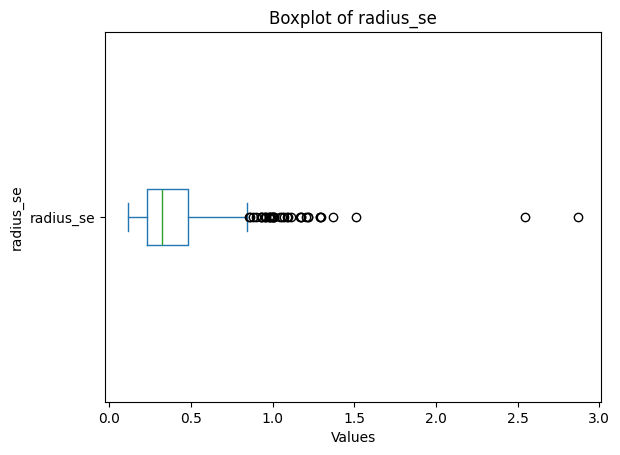

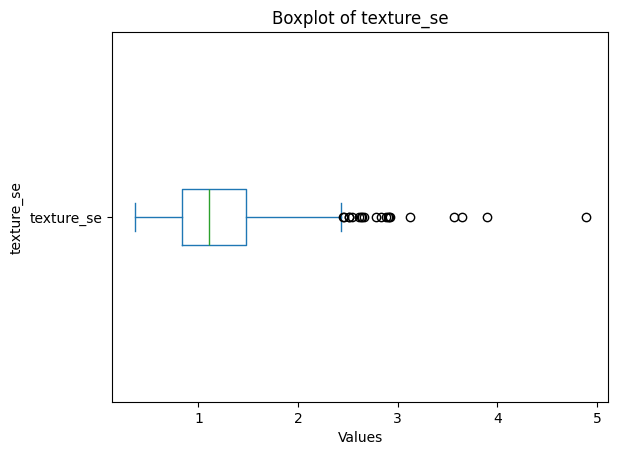

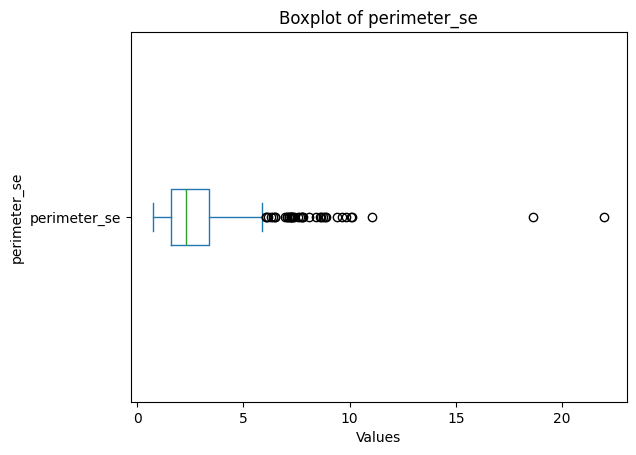

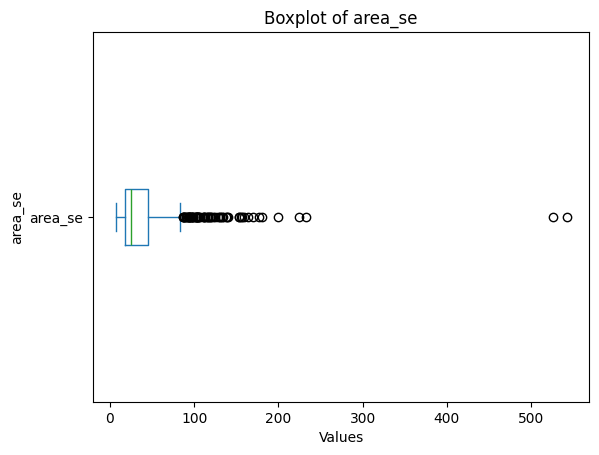

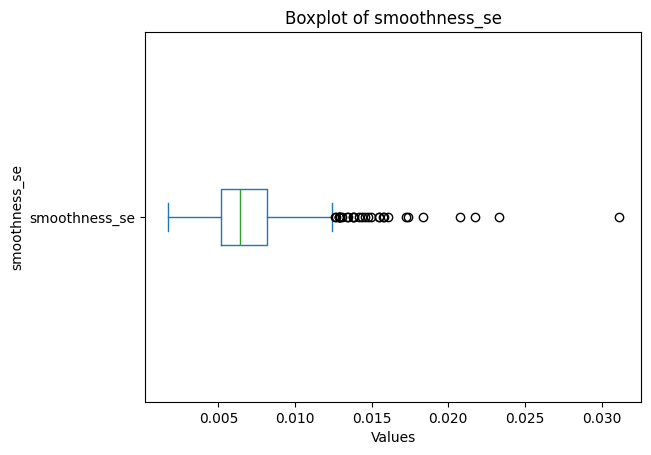

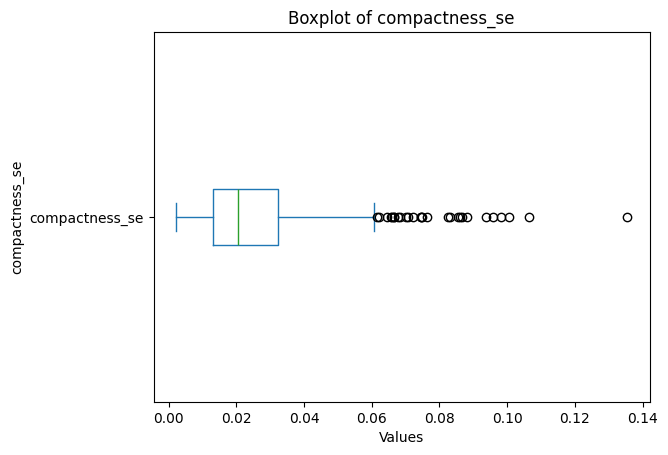

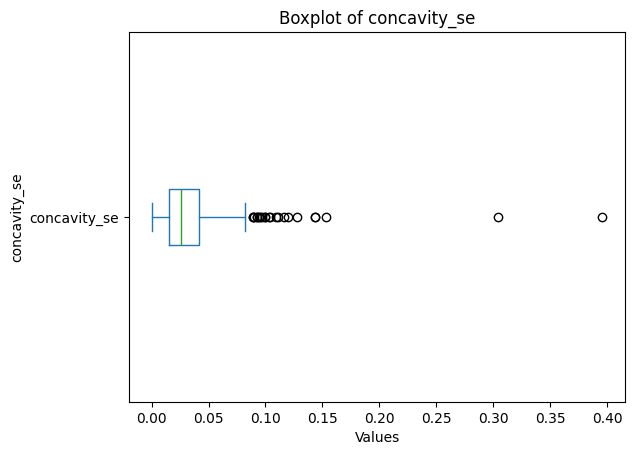

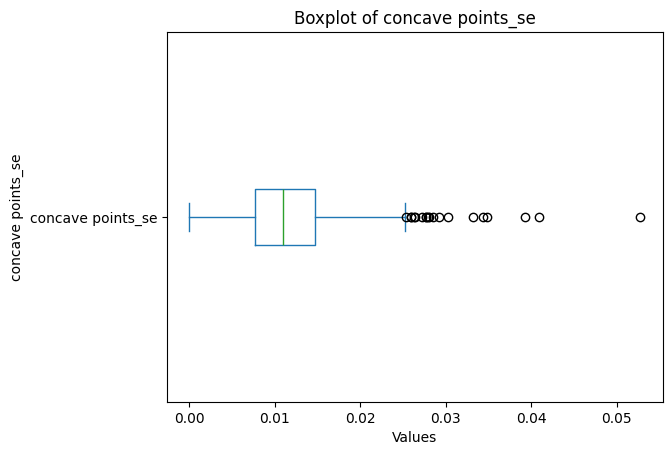

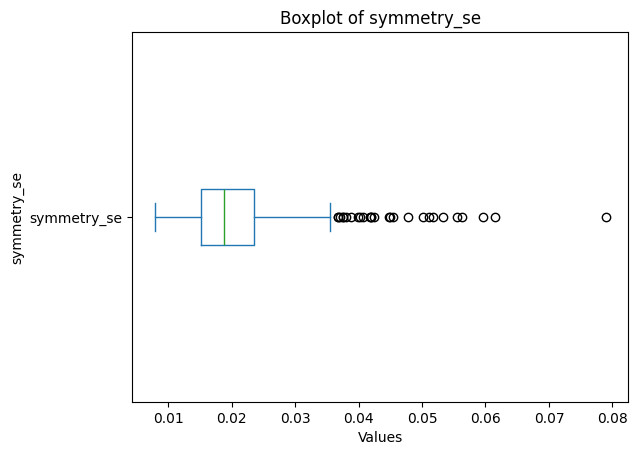

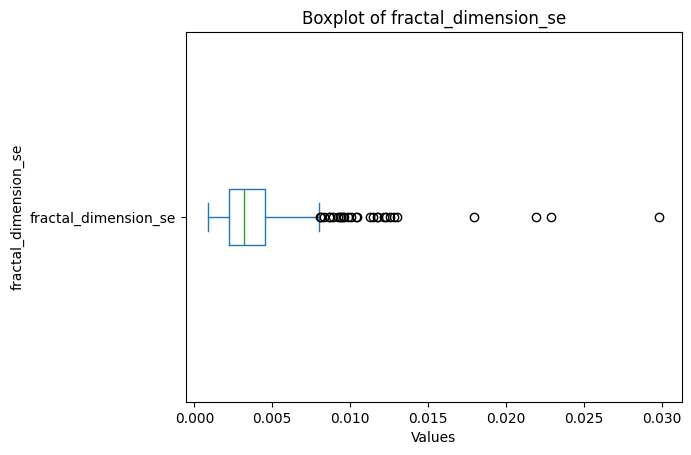

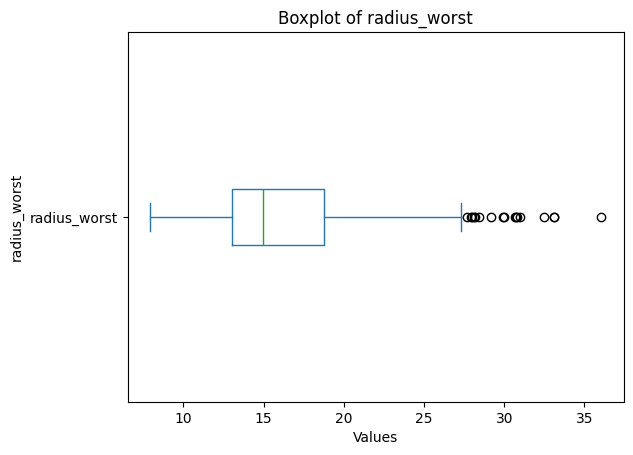

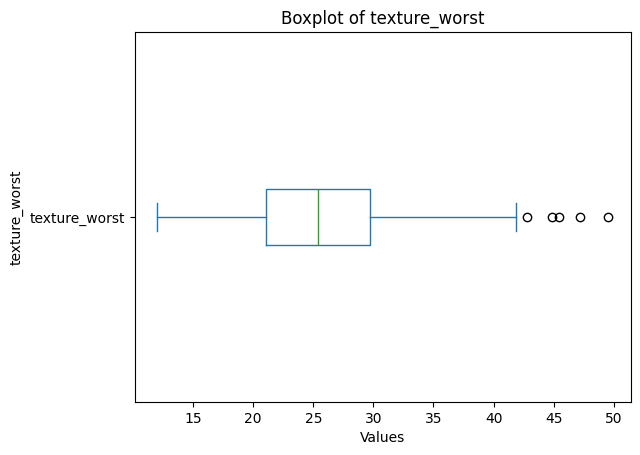

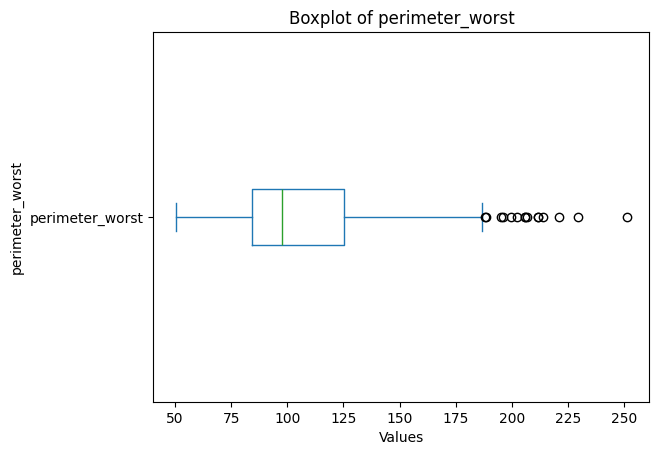

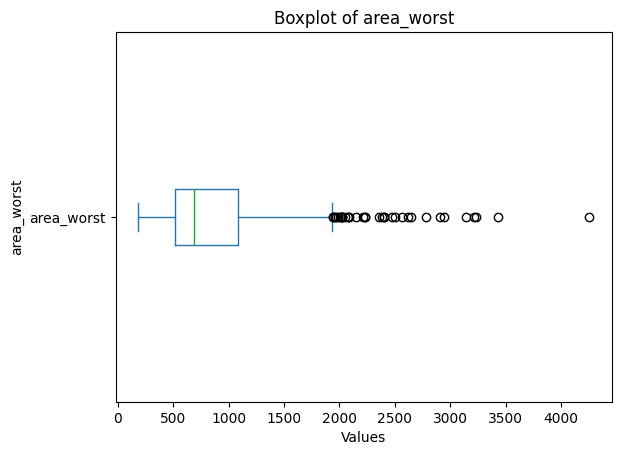

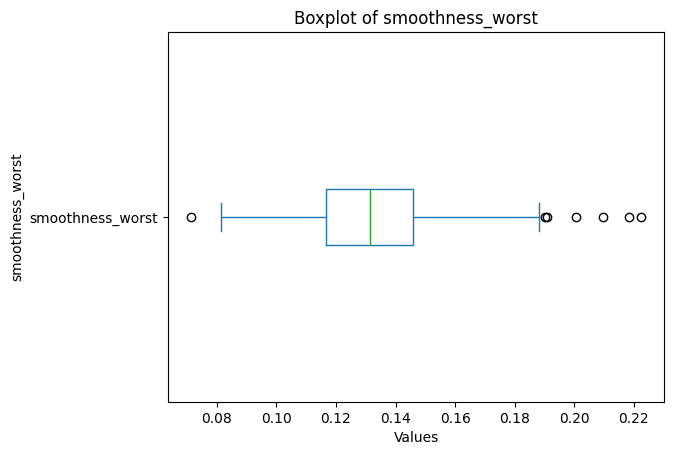

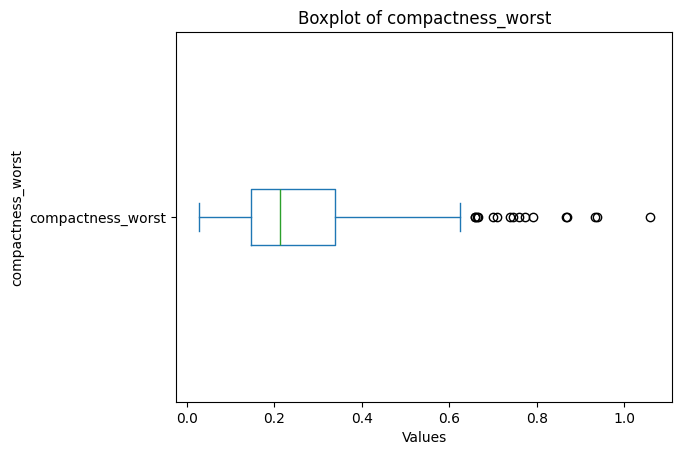

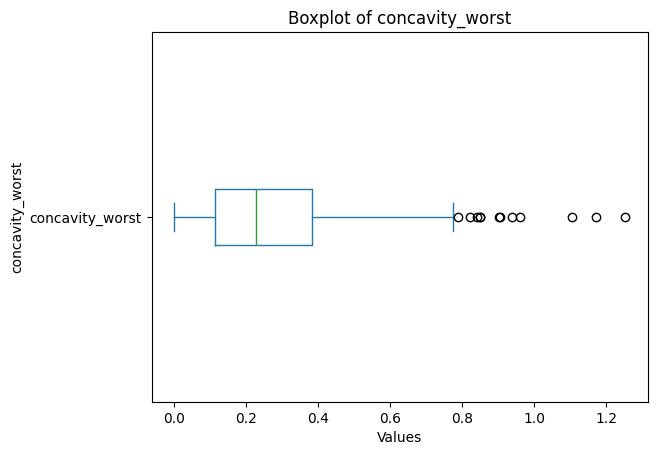

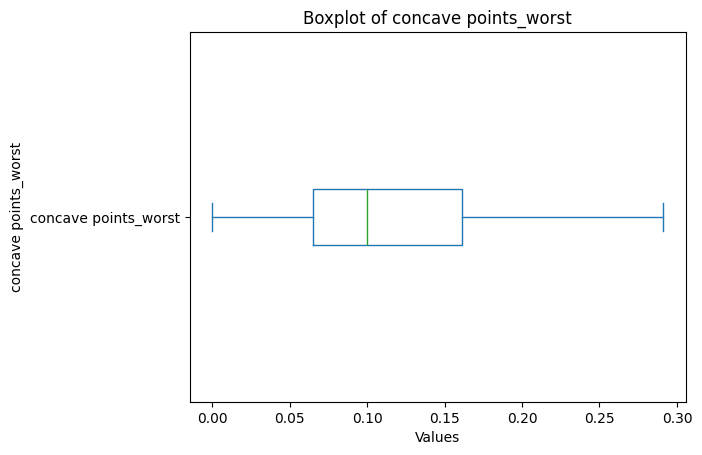

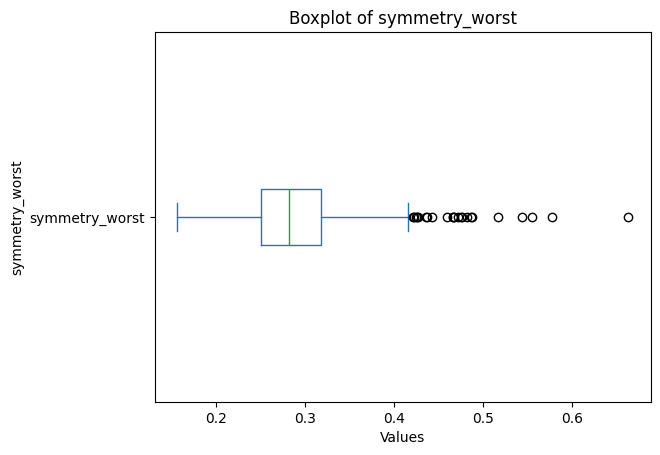

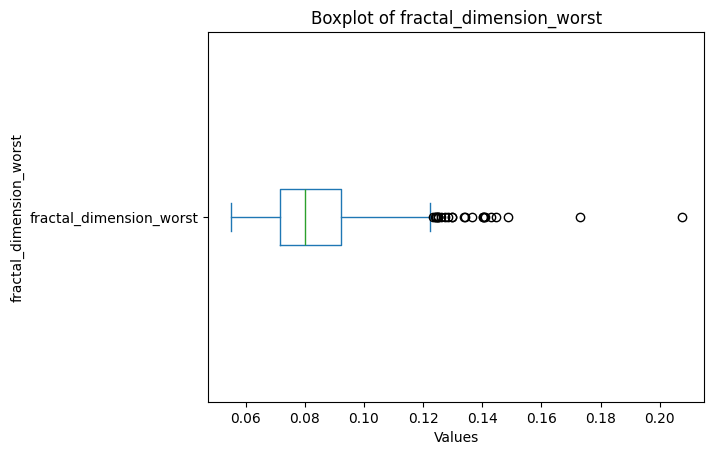

In [15]:
for i in X.columns:
    X[i].plot(kind='box' , vert  =False)
    plt.title(f'Boxplot of {i}')
    plt.xlabel('Values')
    plt.ylabel(i)
    plt.show()

In [16]:
lbl = LabelEncoder()
y_train['diagnosis']= lbl.fit_transform(y_train['diagnosis'])
y_test['diagnosis']= lbl.transform(y_test['diagnosis'])


In [17]:
X_train_Without_Id= X_train.drop("id",axis=1)
X_test_Without_Id = X_test.drop("id",axis=1)

In [18]:
X_train_Without_Id.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216


In [19]:
norm = Normalizer()
X_train_Without_Id[normalized_col] =( norm.fit_transform(X_train_Without_Id[normalized_col]))
X_test_Without_Id[normalized_col] =norm.transform(X_test_Without_Id[normalized_col])

In [20]:
X_train_Without_Id.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,0.013585,0.019641,0.088410,0.591632,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,0.015738,0.026080,0.107248,0.792638,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,0.016894,0.018418,0.109595,0.631684,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,0.018488,0.024683,0.126642,0.755582,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,0.016100,0.021259,0.102610,0.660568,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,...,0.017002,0.033931,0.107672,0.734236,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,0.012271,0.013537,0.080169,0.581590,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,0.014422,0.016427,0.095525,0.803075,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,0.010967,0.015038,0.070777,0.511364,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,0.014246,0.023069,0.092187,0.850157,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216


In [21]:
X_train[X_train_Without_Id.columns] = X_train_Without_Id
X_test[X_test_Without_Id.columns] = X_test_Without_Id

In [22]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,911654,0.013585,0.019641,0.088410,0.591632,0.08931,0.11080,0.05063,0.03058,0.1506,...,0.015738,0.026080,0.107248,0.792638,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,866714,0.016894,0.018418,0.109595,0.631684,0.10660,0.09509,0.02855,0.02882,0.1880,...,0.018488,0.024683,0.126642,0.755582,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,884448,0.016100,0.021259,0.102610,0.660568,0.07215,0.04524,0.04336,0.01105,0.1487,...,0.017002,0.033931,0.107672,0.734236,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,879523,0.012271,0.013537,0.080169,0.581590,0.08876,0.09588,0.07550,0.04079,0.1594,...,0.014422,0.016427,0.095525,0.803075,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,848406,0.010967,0.015038,0.070777,0.511364,0.09867,0.07200,0.07395,0.05259,0.1586,...,0.014246,0.023069,0.092187,0.850157,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216


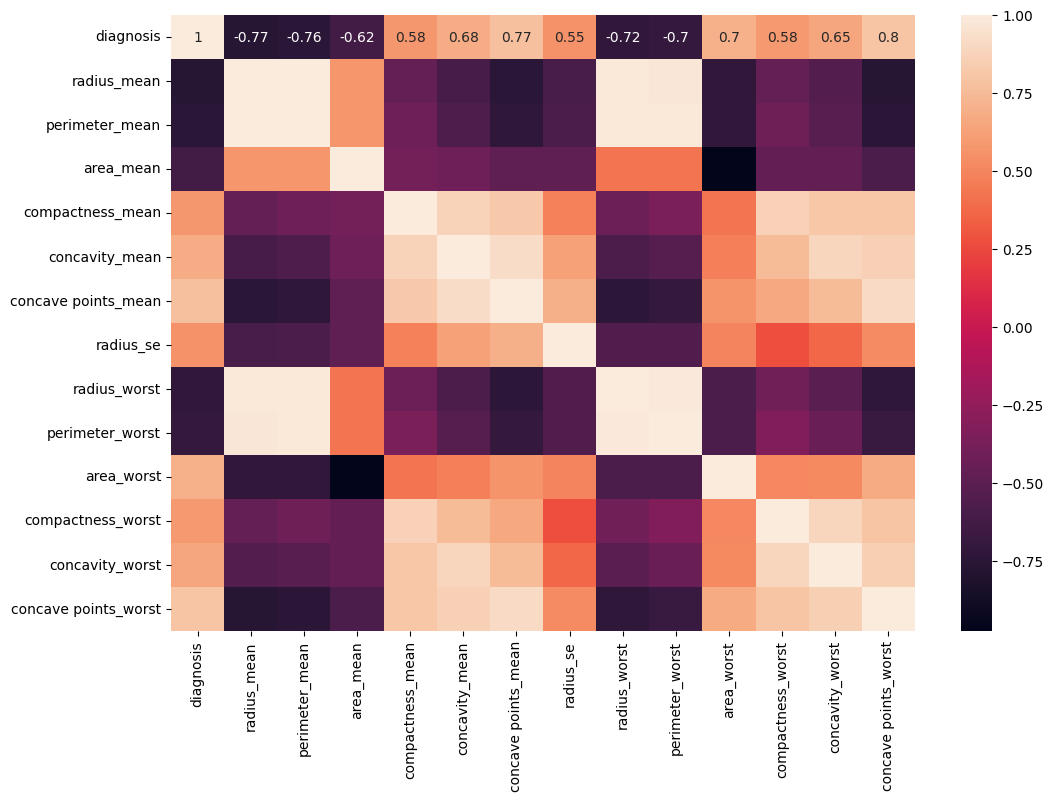

In [23]:
all_data = pd.concat([y_train,X_train],axis=1)
corr=all_data.corr()
top_feature = corr.index[abs(corr['diagnosis'])>0.55]
plt.subplots(figsize=(12, 8))
top_corr = all_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [24]:
top_corr = top_corr.drop("diagnosis",axis=1)

In [25]:
X_train = X_train[top_corr.columns]
X_test = X_test[top_corr.columns]

In [26]:
logistic_model = LogisticRegression()


In [27]:
logistic_model.fit(X_train,y_train)

c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
from sklearn import  linear_model, metrics
from sklearn.metrics import confusion_matrix


In [29]:
logistic_predict  = logistic_model.predict(X_test)

print("Logistic test accuracy : ",metrics.accuracy_score(logistic_predict,y_test))

logistic_predict_train  = logistic_model.predict(X_train)

print("Logistic train accuracy : ",metrics.accuracy_score(logistic_predict_train,y_train))

Logistic test accuracy :  0.9210526315789473
Logistic train accuracy :  0.9164835164835164


In [30]:
print( confusion_matrix(y_test, logistic_predict))
 #predict >>> #  false   # true
# false #    true negative   false positive 
# true  #   false negative   true positive      

[[69  3]
 [ 6 36]]


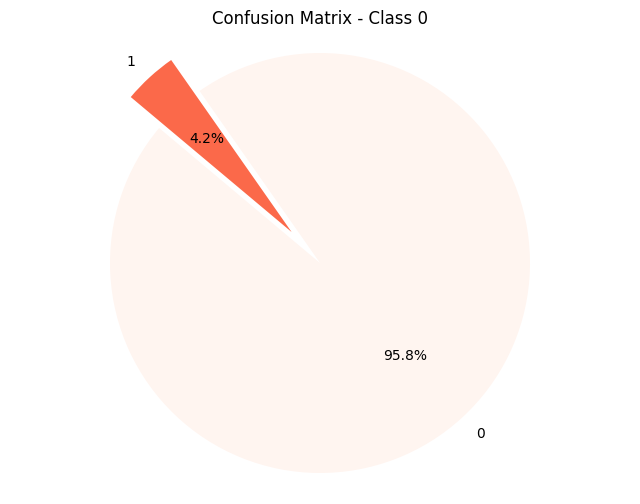

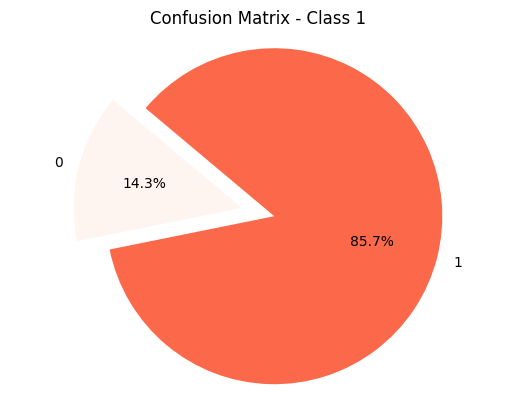

In [31]:

cm = confusion_matrix(y_test, logistic_predict)

class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
colors = plt.cm.Reds(np.linspace(0, 0.5, len(class_names)))
myexplode = [0,0.2]
for i in range(len(class_names)):
    plt.pie(cm[i], labels=class_names, colors=colors, autopct='%1.1f%%', startangle=140 , explode=myexplode)
    plt.title(f'Confusion Matrix - Class {class_names[i]}')
    plt.axis('equal') 
    plt.show()


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linear_model = LinearRegression()

In [34]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [35]:
linear_predict  = linear_model.predict(X_test)
predict = np.round(linear_predict)
print("mean Sqr error is : " , mean_squared_error(predict , y_test) )


mean Sqr error is :  0.07017543859649122


In [36]:
linear_predict  = linear_model.predict(X_test)
predict = np.round(linear_predict)
print("Linear test accuracy : ",metrics.accuracy_score(predict,y_test))

linear_predict_train  = linear_model.predict(X_train)
linear_predict_train = np.round(linear_predict_train)

print("Linear train accuracy : ",metrics.accuracy_score(linear_predict_train,y_train))

Linear test accuracy :  0.9298245614035088
Lineartrain accuracy :  0.9582417582417583


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [38]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNN_y_pred_Train = knn.predict(X_train)

KNN_accuracyTrain = accuracy_score(y_train, KNN_y_pred_Train)
print("KNN Accuracy train: ",KNN_accuracyTrain)

KNN_y_pred = knn.predict(X_test)
KNN_accuracyTest = accuracy_score(y_test, KNN_y_pred)
print("KNN Accuracy test: ",KNN_accuracyTest)

KNN Accuracy train:  0.9736263736263736
KNN Accuracy test:  0.9210526315789473


c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)



RF_y_pred_Train = rf.predict(X_train)
RF_accuracyTrain = accuracy_score(y_train, RF_y_pred_Train)
print("RF_accuracy accuracy train : " , RF_accuracyTrain)


RF_y_pred = rf.predict(X_test)
RF_accuracyTest = accuracy_score(y_test, RF_y_pred)
print("RF_accuracy accuracy test : " , RF_accuracyTest)

c:\Users\Hafez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF_accuracy accuracy train :  1.0
RF_accuracy accuracy test :  0.9824561403508771


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)



dt_y_pred_Train = dt.predict(X_train)
dt_accuracyTrain = accuracy_score(y_train, dt_y_pred_Train)
print("Decision Tree Train Accuracy: " , dt_accuracyTrain)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Test Accuracy: " , accuracy)

Decision Tree Accuracy:  1.0
Decision Tree Accuracy:  0.9385964912280702
